In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.dummy import DummyRegressor

from scipy.stats.stats import pearsonr

from datetime import datetime as dt
from copy import deepcopy
import pickle

%matplotlib inline

In [2]:
df_mod = pd.read_pickle('df_mod.pk1')

# EDA

## Characteristics of target

In [40]:
print('Avg critic score: ' + str(df_mod.score.mean()))
print('Max: ' + str(df_mod.score.max()))
print('Min: ' + str(df_mod.score.min()))
print('Median: ' + str(df_mod.score.median()))
print('Standard Dev: ' + str(df_mod.score.std()))

Avg critic score: 77.45255474452554
Max: 96
Min: 38
Median: 78.0
Standard Dev: 10.016876056200843


## Overall correlations

In [4]:
df_mod.corr()

,target_age,game_type_Fighting,game_type_Misc Action/Other,game_type_Platformer,game_type_Puzzle/Strategy,game_type_RPG,game_type_Racing,game_type_Shooter,game_type_Sports,console_PlayStation 4,console_Xbox One,score
target_age,1.000000,-0.007188,0.062297,-0.343932,-0.031327,0.166319,-0.112752,0.207055,-0.202940,0.196514,0.136161,0.204556
game_type_Fighting,-0.007188,1.000000,-0.090249,-0.098732,-0.045162,-0.106941,-0.065114,-0.151647,-0.034720,0.031457,-0.082393,0.009407
game_type_Misc Action/Other,0.062297,-0.090249,1.000000,-0.165479,-0.075694,-0.179238,-0.109134,-0.254167,-0.058193,-0.002839,-0.024286,-0.128048
game_type_Platformer,-0.343932,-0.098732,-0.165479,1.000000,-0.082809,-0.196086,-0.119393,-0.278059,-0.063663,0.017156,-0.063189,-0.137040
game_type_Puzzle/Strategy,-0.031327,-0.045162,-0.075694,-0.082809,1.000000,-0.089694,-0.054613,-0.127190,-0.029121,0.037505,-0.044985,-0.004925
game_type_RPG,0.166319,-0.106941,-0.179238,-0.196086,-0.089694,1.000000,-0.129320,-0.301178,-0.068956,-0.041770,0.026752,0.215759
game_type_Racing,-0.112752,-0.065114,-0.109134,-0.119393,-0.054613,-0.129320,1.000000,-0.183381,-0.041986,-0.058171,0.056862,0.015392
game_type_Shooter,0.207055,-0.151647,-0.254167,-0.278059,-0.127190,-0.301178,-0.183381,1.000000,-0.097783,0.011170,0.084029,0.134867
game_type_Sports,-0.202940,-0.034720,-0.058193,-0.063663,-0.029121,-0.068956,-0.041986,-0.097783,1.000000,-0.150723,0.116859,-0.246661
console_PlayStation 4,0.196514,0.031457,-0.002839,0.017156,0.037505,-0.041770,-0.058171,0.011170,-0.150723,1.000000,-0.669781,-0.029587


In [5]:
df_mod.corr().score.sort_values(ascending=False)

score                          1.000000
game_type_RPG                  0.215759
target_age                     0.204556
console_Xbox One               0.161786
game_type_Shooter              0.134867
game_type_Racing               0.015392
game_type_Fighting             0.009407
game_type_Puzzle/Strategy     -0.004925
console_PlayStation 4         -0.029587
game_type_Misc Action/Other   -0.128048
game_type_Platformer          -0.137040
game_type_Sports              -0.246661
Name: score, dtype: float64

## Checking score correlations for each esrb rating category

In [89]:
#Making separate DataFrames for each esrb rating
df_E = df_mod[df_mod['esrb rating'] == 'Everyone']
df_E10 = df_mod[df_mod['esrb rating'] == 'Everyone 10+']
df_T = df_mod[df_mod['esrb rating'] == 'Teen']
df_M = df_mod[df_mod['esrb rating'] == 'Mature']

In [90]:
df_E.corr().score.sort_values(ascending=False)   #everyone

score                          1.000000
console_Xbox One               0.614909
game_type_Platformer           0.282790
game_type_Racing              -0.023228
game_type_Shooter             -0.053642
game_type_Sports              -0.304556
console_PlayStation 4         -0.349862
target_age                          NaN
game_type_Fighting                  NaN
game_type_Misc Action/Other         NaN
game_type_Puzzle/Strategy           NaN
game_type_RPG                       NaN
Name: score, dtype: float64

In [91]:
df_E10.corr().score.sort_values(ascending=False)  #everyone 10+

score                          1.000000
console_Xbox One               0.194344
game_type_Shooter              0.183117
console_PlayStation 4          0.047098
game_type_Fighting             0.045149
game_type_RPG                  0.028229
game_type_Puzzle/Strategy     -0.034779
game_type_Platformer          -0.043584
game_type_Racing              -0.079616
game_type_Misc Action/Other   -0.150191
target_age                          NaN
game_type_Sports                    NaN
Name: score, dtype: float64

In [92]:
df_T.corr().score.sort_values(ascending=False)  #teen

score                          1.000000
game_type_RPG                  0.208309
game_type_Misc Action/Other    0.172526
game_type_Shooter              0.151661
console_PlayStation 4          0.128131
game_type_Fighting             0.100960
game_type_Platformer          -0.121407
console_Xbox One              -0.218791
game_type_Sports              -0.719213
target_age                          NaN
game_type_Puzzle/Strategy           NaN
game_type_Racing                    NaN
Name: score, dtype: float64

In [93]:
df_M.corr().score.sort_values(ascending=False)  #mature

score                          1.000000
game_type_RPG                  0.333277
console_Xbox One               0.267734
game_type_Puzzle/Strategy      0.057635
game_type_Shooter              0.040348
game_type_Racing               0.004883
game_type_Fighting            -0.010646
console_PlayStation 4         -0.215305
game_type_Platformer          -0.230928
game_type_Misc Action/Other   -0.286595
target_age                          NaN
game_type_Sports                    NaN
Name: score, dtype: float64

## Check out scores over time

Pearson Correlation = -0.09576961427.
p-value = 0.265603340041


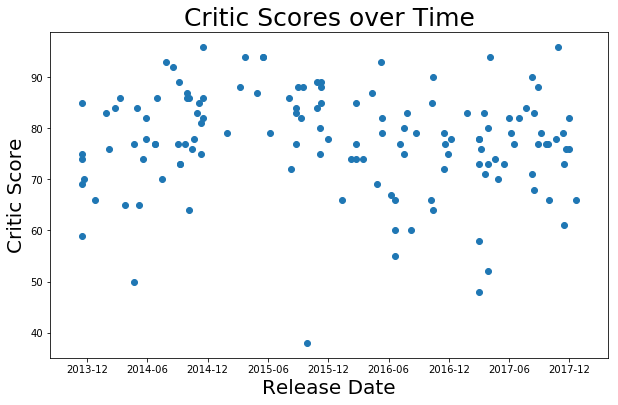

In [75]:
#plotting the scores over time
dates = [timestamp.date() for timestamp in df_mod.released]  #make the dates usable to plt
scores = df_mod.score

timeplot = plt.scatter(dates, scores)
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Critic Scores over Time', size=25);
plt.xlabel('Release Date', size=20)
plt.ylabel('Critic Score', size=20)

#find the numerical correlation between release date and score
arbitrary_date = dt(1970,1,1).date()
date_nums = [(d - arbitrary_date).total_seconds() for d in dates]  #make dates usable to pearsonr

print("Pearson Correlation = %s.\np-value = %s"%pearsonr(date_nums, scores))

# Modeling

## Helper Functions

In [12]:
def adj_r_squared(model, X, y):
    """computes R^2 and adjusted R^2. (input: lr model, X matrix, and the y array)"""
    yhat = model.predict(X)
    SS_Residual = sum((y-yhat)**2)
    SS_Total = sum((y-np.mean(y))**2)
    
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    
    return {'R^2':r_squared, 'Adjusted R^2':adjusted_r_squared}

def root_mse(model, X, y):
    """computes MSE and RMSE. (input: lr model, X matrix, and the y array)"""
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    return {'MSE':mse, 'RMSE':rmse}
    
    
def calc_ISE(model, X_train, y_train):
    '''returns the in-sample adjusted R^2 and RMSE; assumes model already fit.'''
    adj_r2 = adj_r_squared(model, X_train, y_train)['Adjusted R^2']
    rmse = root_mse(model, X_train, y_train)['RMSE']
    
    return {'Adjusted R^2':adj_r2, 'RMSE':rmse}
    
    
def calc_OSE(model, X_test, y_test):
    '''returns the out-of-sample adjusted R^2 and RMSE; assumes model already fit.'''
    adj_r2 = adj_r_squared(model, X_test, y_test)['Adjusted R^2']
    rmse = root_mse(model, X_test, y_test)['RMSE']

    return {'Adjusted R^2':adj_r2,'RMSE':rmse}


def calc_ISE_OSE(model, X_train, y_train, X_test, y_test):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    ISE = calc_ISE(model, X_train, y_train)
    OSE = calc_OSE(model, X_test, y_test)
    return {'In sample':ISE,'Out of sample':OSE}


def cross_validation(model, X, y, folds=10):
    '''takes a model, the X matrix, and y array, runs cross validation (default 10 folds)
    returns a dict with the train error and validation error'''
    k = folds
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    train_errors = []
    validation_errors = []
    
    y = np.array(y)
    if type(X) != np.ndarray:
        X = X.as_matrix()
    
    
    for train_index, val_index in kf.split(X, y):
        # split data
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        #calculate errors
        train_error, val_error = (calc_ISE_OSE(model, X_train, y_train, X_val, y_val)['In sample']['RMSE'],
                                  calc_ISE_OSE(model, X_train, y_train, X_val, y_val)['Out of sample']['RMSE'])
        
        # append to appropriate list
        train_errors.append(train_error)
        validation_errors.append(val_error)
        
    return {'Train error':np.mean(train_errors),
           'Validation error:':np.mean(validation_errors)}
        

## Single variable models

### target age

In [13]:
lr = LinearRegression()
X = df_mod['target_age'].values.reshape(-1,1)
y = np.array(df_mod.score)

lr.fit(X, y);

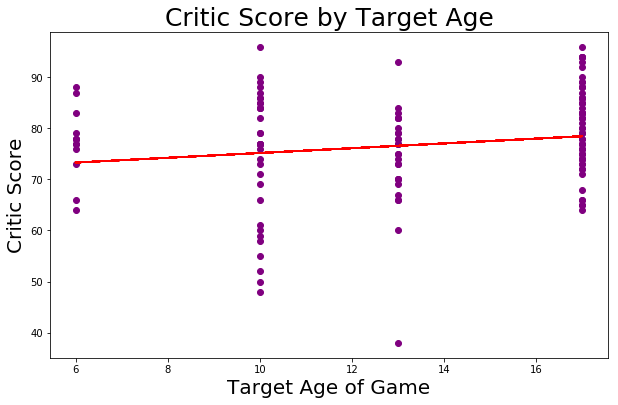

In [82]:
#plotting the data
target_ages = df_mod.target_age
scores = df_mod.score

plt.scatter(target_ages, scores, color='purple')
plt.title('Critic Score by Target Age', size=25)
plt.xlabel('Target Age of Game', size=20)
plt.ylabel('Critic Score', size=20)

#plotting the regression line
plt.plot(target_ages, lr.predict(target_ages.values.reshape(-1, 1)), color='red')

In [15]:
print(adj_r_squared(lr, X, y))
print(root_mse(lr, X, y))

{'R^2': 0.041843049850308178, 'Adjusted R^2': 0.03474559096031038}
{'MSE': 95.43761891220349, 'RMSE': 9.7692179273575164}


In [87]:
print('score = %s*\'Target Age\' + %s'%(lr.coef_, lr.intercept_))

score = [ 0.46871703]*'Target Age' + 70.4790197604


In [88]:
cross_validation(lr,X,y)

{'Train error': 9.7607517145063447, 'Validation error:': 9.7225148649300763}

### game type

In [17]:
lr2 = LinearRegression()
X2 = df_mod.iloc[:, 8:-3]
y2 = np.array(df_mod.score)

lr2.fit(X2, y2);

In [18]:
adj_r_squared(lr2, X2, y2)

{'Adjusted R^2': 0.094867313011997689, 'R^2': 0.14811041224658605}

In [19]:
cross_validation(lr2,X2,y2)

{'Train error': 9.1577857097852409, 'Validation error:': 9.9923611179776746}

### console

In [20]:
lr3 = LinearRegression()
X3 = df_mod.iloc[:, -3:-1]
y3 = np.array(df_mod.score)

lr3.fit(X3, y3);

In [21]:
adj_r_squared(lr3, X3, y3)

{'Adjusted R^2': 0.023062124161221109, 'R^2': 0.037428857629438372}

In [22]:
cross_validation(lr3,X3,y3)

{'Train error': 9.7714971678691374, 'Validation error:': 9.9048403908842086}

## Multivariate models

### 'target age' and 'game type'

In [23]:
lr4 = LinearRegression()
X4 = df_mod.iloc[:, 7:-3]
y4 = np.array(df_mod.score)

lr4.fit(X4, y4);

In [24]:
adj_r_squared(lr4, X4, y4)

{'Adjusted R^2': 0.096193104423498266, 'R^2': 0.15600385486606094}

In [25]:
cross_validation(lr4,X4,y4)

{'Train error': 9.1097299765944602, 'Validation error:': 10.062534034274563}

### 'target age' and 'console'

In [26]:
lr5 = LinearRegression()

#isolates the 'console' columns
X5 = df_mod.iloc[:, -3:-1]

#adds 'target_age' column into the X matrix
target_age_col = df_mod.target_age
X5['target_age'] = target_age_col

y5 = np.array(df_mod.score)

lr5.fit(X5, y5);

In [27]:
adj_r_squared(lr5, X5, y5)

{'Adjusted R^2': 0.040317585641305276, 'R^2': 0.061487050663923459}

In [28]:
cross_validation(lr5,X5,y5)

{'Train error': 9.6467716778224641, 'Validation error:': 9.8051082173226956}

### 'game type' and 'console'

In [29]:
lr6 = LinearRegression()
X6 = df_mod.iloc[:, 8:-1]
y6 = np.array(df_mod.score)

lr6.fit(X6, y6);

In [30]:
adj_r_squared(lr6, X6, y6)

{'Adjusted R^2': 0.11576669314198862, 'R^2': 0.18078384805801895}

In [31]:
cross_validation(lr6,X6,y6)

{'Train error': 8.965709209088546, 'Validation error:': 10.090215847214054}

## Kitchen sink model

In [32]:
lr7 = LinearRegression()
X7 = df_mod.iloc[:, 7:-1]
y7 = np.array(df_mod.score)

lr7.fit(X7, y7);

In [33]:
adj_r_squared(lr7, X7, y7)

{'Adjusted R^2': 0.11010347351895511, 'R^2': 0.18208039845492197}

In [34]:
cross_validation(lr7,X7,y7)

{'Train error': 8.9555833245930572, 'Validation error:': 10.142274006958761}

## Dummy model for comparison

In [36]:
dumb = DummyRegressor()
Xdumb = df_mod.iloc[:, 7:-1]
ydumb = np.array(df_mod.score)

dumb.fit(Xdumb, ydumb);

In [37]:
adj_r_squared(dumb, Xdumb, ydumb)

{'Adjusted R^2': -0.088000000000000078, 'R^2': 0.0}

In [39]:
cross_validation(dumb,Xdumb,ydumb)

{'Train error': 9.9725366573866943, 'Validation error:': 9.9257991473688314}